# Case

This is a comprehensive analysis of the Android app market by comparing about ten thousand apps in Google Play across different categories. 

**Our Business Task:**
>Looking for insights in the data to devise strategies to drive growth and retention. 

<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>

**Data Source**
> Scraped from the Google Play website.

`apps.csv:` contains all the details of the apps on Google Play. These are the features that describe an app.

`user_reviews.csv:` contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed, passed through a sentiment analyzer engine and tagged with its sentiment score.



# Process
Checklist:
* Missing Data
* Data Types


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Reading data and looking at it

In [17]:
apps_df = pd.read_csv('apps.csv', index_col=0)
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [19]:
# the number of apps in the dataset
apps_df['App'].count()

9659

In [20]:
# a rondom look at some apps
apps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4716,W Pro - Weather Forecast & Animated Weather Maps,WEATHER,3.8,11,2.9,500+,Paid,$1.99,Everyone,Weather,"April 23, 2018",1,4.1 and up
2099,Cars: Lightning League,FAMILY,4.5,58795,77.0,"10,000,000+",Free,0,Everyone,Racing;Action & Adventure,"May 21, 2018",1.6,4.0.3 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,NaN,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
5386,League of Gamers - Be an E-Sports Legend!,SPORTS,4.5,68072,40.0,"5,000,000+",Free,0,Everyone,Sports,"July 26, 2018",1.1.7,4.1 and up
10060,An Elite Warrior Ex,GAME,4.7,15,93.0,100+,Paid,$0.99,Everyone,Adventure,"November 21, 2016",1.59,4.0.3 and up


### 2. Cleaning

In [21]:
char_to_remove = ['+', '$', ',']
col = ['Installs', 'Price', ]

In [22]:
for col in col:
    for char in char_to_remove:
        apps_df[col] = apps_df[col].apply(lambda x: x.replace(char, '') )

In [23]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


### 3. Correcting data types
The four features that we will be working with most frequently henceforth are ``Installs, Size, Rating and Price.`` While Size and Rating are both float (i.e. purely numerical data types), we still need to work on Installs and Price to make them numeric.

In [25]:
apps_df['Installs'] = apps_df['Installs'].astype(float)
apps_df['Price'] = apps_df['Price'].astype(float)

In [26]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


# Analyze

### 4. Exploring app categories¶

* Which category has the highest share of (active) apps in the market?
* Is any specific category dominating the market?
* Which categories have the fewest number of apps?

In [27]:
unique_categories = apps_df['Category'].unique()
unique_categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [28]:
num_unique_categories = len(unique_categories)
print(f'the number of unique categories is : {num_unique_categories} category')

the number of unique categories is : 33 category


In [29]:
np.count_nonzero(unique_categories)

33

In [57]:
num_apps_in_category = apps_df['Category'].value_counts().sort_values(ascending=False)
num_apps_in_category

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

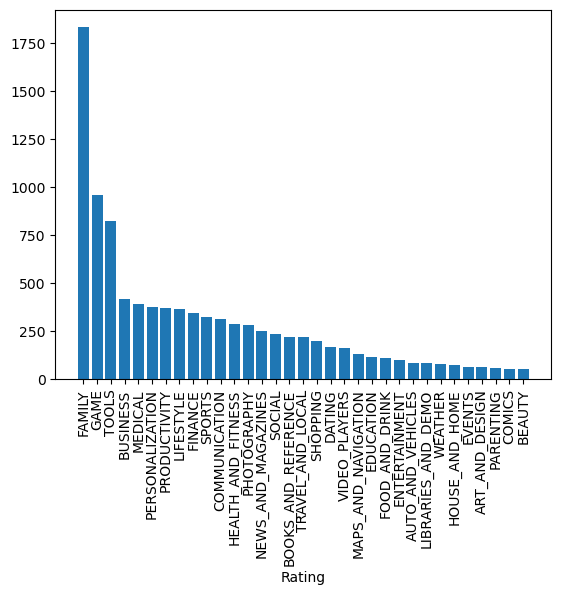

In [68]:
plt.bar(num_apps_in_category.index, num_apps_in_category.values)

plt.xlabel('Rating')
plt.xticks(rotation=90)

plt.show()

In [55]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

**Conclusion:**
> `Family` and `Game apps` have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

### 5. Distribution of app ratings

In [32]:
apps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,20.395327,7.777507e+06,1.099299
std,0.536625,1.831320e+06,21.827509,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [33]:
apps_df['Rating'].mean()

4.173243045387998

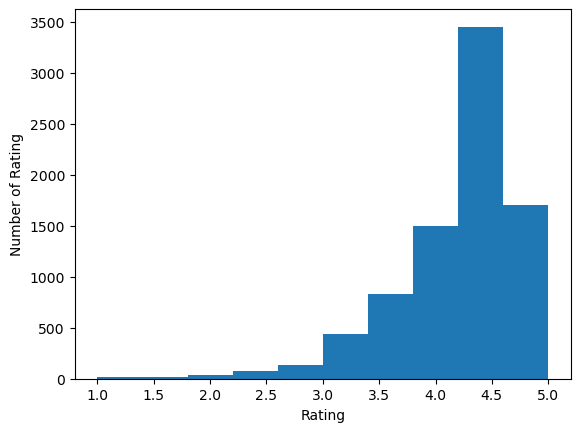

In [34]:
plt.hist(apps_df['Rating'])

plt.xlabel('Rating')
plt.ylabel('Number of Rating')
plt.show()

**Conclusion:**
> We can see that the average volume of ratings across all app categories is `4.17` which is pretty good. The histogram plot is skewed to the left indicating that `the majority of the apps` are `highly rated` with only a few exceptions in the low-rated apps.

### 6. Size and price of an app
How can we effectively come up with strategies to size and price our app?

* Does the size of an app affect its rating?
* Do users really care about system-heavy apps or do they prefer light-weighted apps?
* Does the price of an app affect its rating?
* Do users always prefer free apps over paid apps?

In [36]:
size_rating = apps_df[(~apps_df['Size'].isnull()) & (~apps_df['Rating'].isnull())]
size_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
size_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7027 non-null   object 
 1   Category        7027 non-null   object 
 2   Rating          7027 non-null   float64
 3   Reviews         7027 non-null   int64  
 4   Size            7027 non-null   float64
 5   Installs        7027 non-null   float64
 6   Type            7027 non-null   object 
 7   Price           7027 non-null   float64
 8   Content Rating  7027 non-null   object 
 9   Genres          7027 non-null   object 
 10  Last Updated    7027 non-null   object 
 11  Current Ver     7023 non-null   object 
 12  Android Ver     7025 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 768.6+ KB


In [84]:
large_categories = size_rating.groupby(['Category']).filter(lambda x: len(x) >= 250)
large_categories.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1050,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000.0,Free,0.0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up
1052,KTB Netbank,FINANCE,3.8,42644,19.0,5000000.0,Free,0.0,Everyone,Finance,"June 28, 2018",8.18,4.2 and up
1053,Mobile Bancomer,FINANCE,4.2,278082,70.0,10000000.0,Free,0.0,Everyone,Finance,"July 30, 2018",10.78,4.0.3 and up
1054,Nedbank Money,FINANCE,4.2,6076,32.0,500000.0,Free,0.0,Everyone,Finance,"July 28, 2018",4.1.1-0-prod,4.2 and up
1055,SCB EASY,FINANCE,4.2,112656,93.0,5000000.0,Free,0.0,Everyone,Finance,"July 19, 2018",3.9.0,4.1 and up


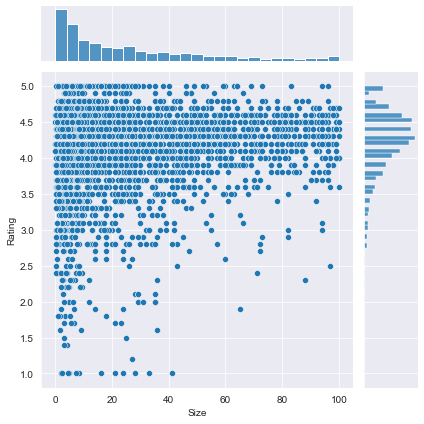

In [90]:
sns.set_style("darkgrid")

sns.jointplot(x='Size', y='Rating', data=larg_categories);

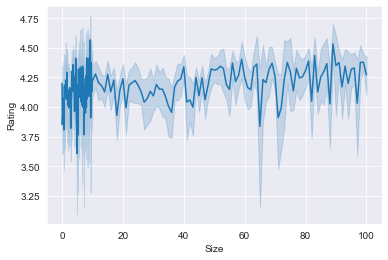

In [102]:
sns.b(x='Size', y='Rating', data=larg_categories);

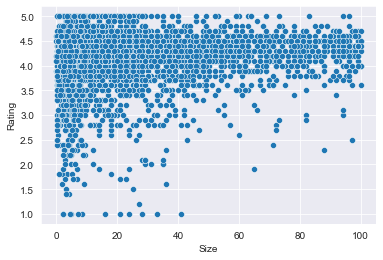

In [103]:
sns.scatterplot(x='Size', y='Rating', data=larg_categories);

In [93]:
paid_apps = size_rating[size_rating['Type'] == 'Paid']
paid_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
852,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.7,21,44.0,1000.0,Paid,5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up
853,Toca Life: City,EDUCATION,4.7,31085,24.0,500000.0,Paid,3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
4491,"Q Alerts: QAnon Drop Notifications, Research +++",NEWS_AND_MAGAZINES,4.7,143,26.0,5000.0,Paid,0.99,Mature 17+,News & Magazines,"July 26, 2018",4.1.10,4.1 and up
10122,Organizer,PRODUCTIVITY,4.4,936,5.4,50000.0,Paid,2.99,Everyone,Productivity,"June 17, 2018",2.96,4.0 and up
9325,E.G. Chess,GAME,4.3,56,23.0,1000.0,Paid,0.99,Everyone,Board,"December 6, 2014",1.0.28,2.3 and up


In [94]:
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 234 to 10785
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             541 non-null    object 
 1   Category        541 non-null    object 
 2   Rating          541 non-null    float64
 3   Reviews         541 non-null    int64  
 4   Size            541 non-null    float64
 5   Installs        541 non-null    float64
 6   Type            541 non-null    object 
 7   Price           541 non-null    float64
 8   Content Rating  541 non-null    object 
 9   Genres          541 non-null    object 
 10  Last Updated    541 non-null    object 
 11  Current Ver     540 non-null    object 
 12  Android Ver     540 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.2+ KB


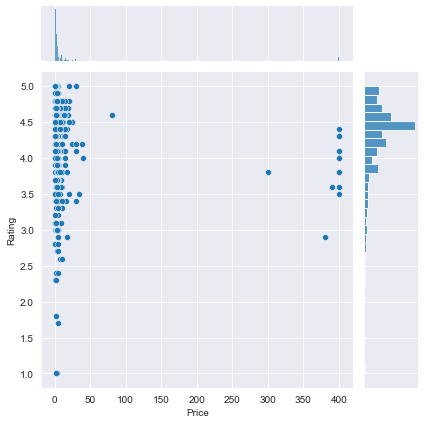

In [99]:
sns.jointplot(x='Price', y='Rating', data=paid_apps);

**Conclusion:**
> * The majority of top rated apps (rating over 4) range from 2 MB to 20 MB 
> * The vast majority of apps price themselves under $10

### 7. Relation between app category and app price

In [104]:
popular_app_category = apps_df[apps_df['Category'].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

In [107]:
popular_app_category.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6660,RoboPad++,FAMILY,4.4,77,10.0,10000.0,Free,0.0,Everyone,Education,"July 7, 2017",1.6,2.3 and up
6784,Ultimate Control BT,BUSINESS,4.6,14,4.3,500.0,Free,0.0,Everyone,Business,"June 6, 2018",3.3.2,4.4 and up
5274,AK-47 Simulation and Info,FAMILY,NaN,2,18.0,100.0,Free,0.0,Everyone,Entertainment,"May 5, 2018",2.0.0,5.0 and up
1067,UBA Mobile Banking,FINANCE,4.3,12185,NaN,1000000.0,Free,0.0,Everyone,Finance,"June 8, 2018",Varies with device,Varies with device
4018,codeEazy - C/C++/JAVA,FAMILY,4.6,130,2.2,10000.0,Free,0.0,Everyone,Education,"April 4, 2016",1.0.3,4.0.3 and up


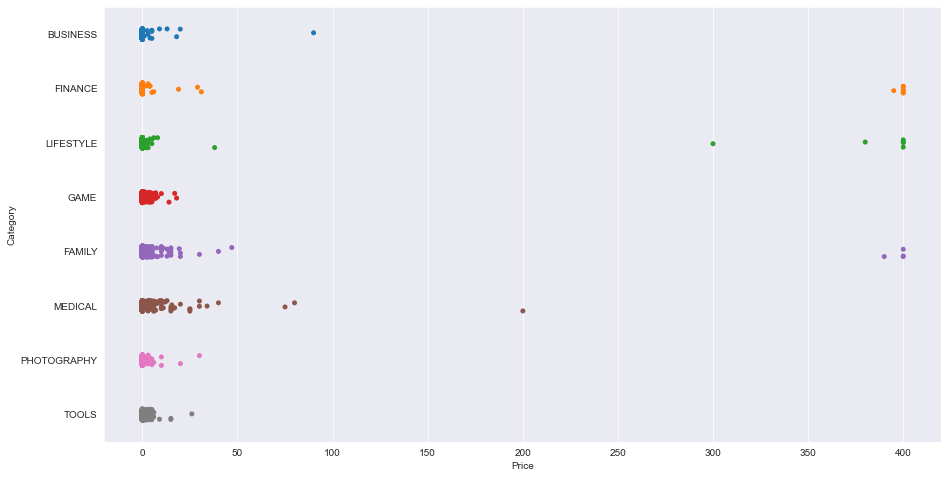

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x='Price', y='Category', data=popular_app_category)

In [118]:
apps_above_200 = apps_df[apps_df['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


**Conclusion:**
> We can see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80

> All game apps are reasonably priced below $20.


### 8. Filter out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

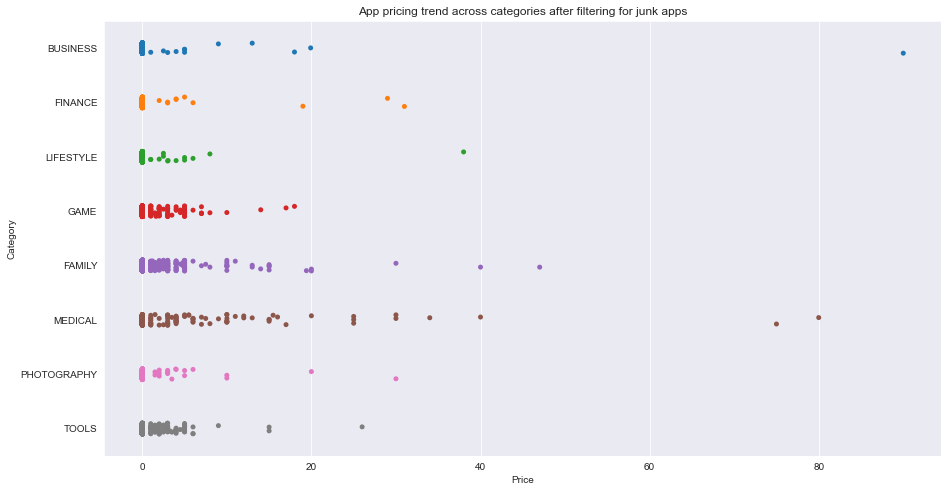

In [131]:
apps_under_100 = popular_app_category[popular_app_category['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x='Price', y='Category', data=apps_under_100)
ax.set_title('App pricing trend across categories after filtering for junk apps')

### 9. Popularity of paid apps vs free apps
For apps in the Play Store today, there are five types of pricing strategies: `free, freemium, paid, paymium, and subscription`. Let's focus on free and paid apps only.
* Are paid apps installed as much as free apps? 

In [133]:
trace0 = go.Box(
    # Data for paid apps
    y = apps_df[apps_df['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps_df[apps_df['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = log',
                autorange = True)
)"Log number of downloads",
                type = '

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [140]:
free_paid_apps = apps_df[apps_df['Type'].isin(['Free', 'Paid'])]
free_paid_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2,0.2,1.0,Paid,0.99,Everyone,Personalization,"August 18, 2017",1,2.3 and up
6412,Gaydorado,FAMILY,3.9,8419,47.0,100000.0,Free,0.00,Teen,Role Playing,"August 1, 2018",0.0.42,4.0.3 and up
5227,Jamaa Amino for Animal Jam,SOCIAL,4.7,3873,63.0,10000.0,Free,0.00,Teen,Social,"July 13, 2018",1.8.19106,4.0.3 and up
6959,CSHS BX,FAMILY,NaN,0,18.0,100.0,Free,0.00,Everyone,Education,"April 17, 2018",1.0.5.170418-cardspl,4.4 and up
9024,Retro City Rampage DX,GAME,4.7,416,16.0,10000.0,Paid,2.99,Teen,Action,"January 12, 2017",1.0.5,4.0 and up


In [142]:
installs_type = free_paid_apps.groupby('Type')['Installs'].sum()
installs_type

Type
Free    7.506557e+10
Paid    5.736488e+07
Name: Installs, dtype: float64

In [161]:
paid = apps_df[apps_df['Type'] == 'Paid']['Installs']
free = apps_df[apps_df['Type'] == 'Free']['Installs']


In [162]:
free.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

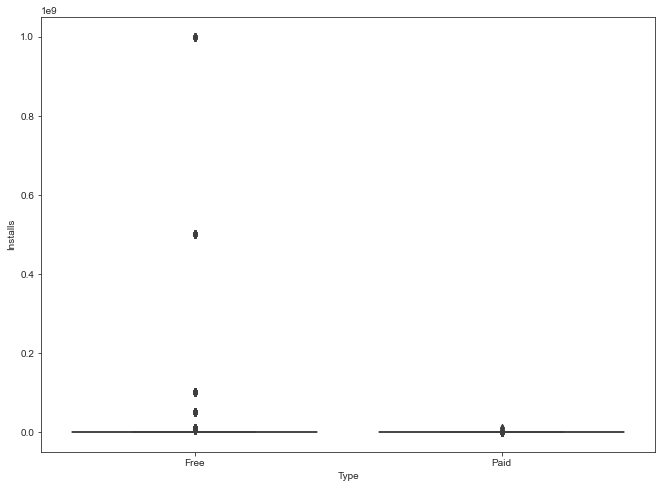

In [224]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x='Type', y='Installs', data=apps_df)

**Conclusion:**
> Paid apps have a relatively lower number of installs than free apps.


### 10. Sentiment analysis of user reviews
Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. 

User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

In [214]:
user_reviews = pd.read_csv('user_reviews.csv')
user_reviews.sample(5)

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
45762,Final Fantasy XV: A New Empire,Note Developers: great big fancy advertisement...,Positive,0.183333,0.463542
48423,Four In A Line,TO PENG AND GOOF BRILLIANT THANKS FOR THE FIRS...,Positive,0.450000,0.511111
54824,Google Ads,I love google,Positive,0.500000,0.600000
31335,Cute Pet Puppies,NaN,NaN,NaN,NaN
3961,AdWords Express,Need time evaluate.,Neutral,0.000000,0.000000


In [215]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Review                  37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [216]:
merged_df = apps_df.merge(user_reviews, on='App')
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [217]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61556 entries, 0 to 61555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     61556 non-null  object 
 1   Category                61556 non-null  object 
 2   Rating                  61556 non-null  float64
 3   Reviews                 61556 non-null  int64  
 4   Size                    41150 non-null  float64
 5   Installs                61556 non-null  float64
 6   Type                    61556 non-null  object 
 7   Price                   61556 non-null  float64
 8   Content Rating          61556 non-null  object 
 9   Genres                  61556 non-null  object 
 10  Last Updated            61556 non-null  object 
 11  Current Ver             61556 non-null  object 
 12  Android Ver             61556 non-null  object 
 13  Review                  35929 non-null  object 
 14  Sentiment               35934 non-null

In [218]:
merged_df = merged_df.dropna(subset=['Sentiment', 'Review'])

In [219]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 61555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   Category                35929 non-null  object 
 2   Rating                  35929 non-null  float64
 3   Reviews                 35929 non-null  int64  
 4   Size                    24069 non-null  float64
 5   Installs                35929 non-null  float64
 6   Type                    35929 non-null  object 
 7   Price                   35929 non-null  float64
 8   Content Rating          35929 non-null  object 
 9   Genres                  35929 non-null  object 
 10  Last Updated            35929 non-null  object 
 11  Current Ver             35929 non-null  object 
 12  Android Ver             35929 non-null  object 
 13  Review                  35929 non-null  object 
 14  Sentiment               35929 non-null

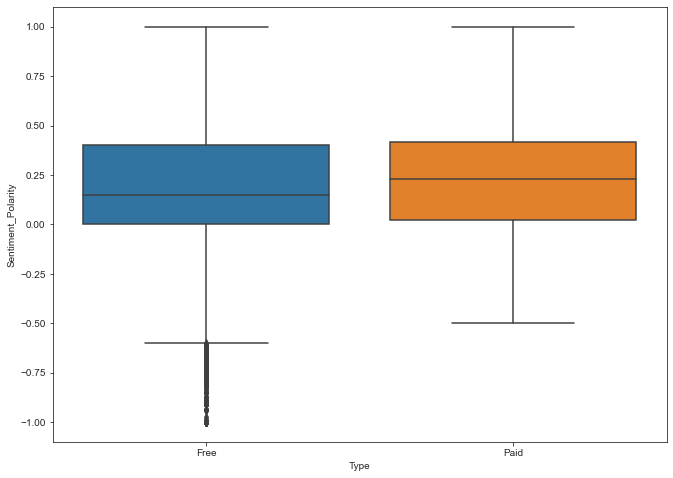

In [222]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)

**Conclusion:**
> By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.


# Overall
In this notebook, we analyzed about ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.


` Note`

This project is one of DataCamp projects

**DONE ON:** 21.09.2021 